In [ ]:
#load data libraries

In [9]:
import os
import pandas as pd
import numpy as np

#load data sets
df = pd.read_csv("data.csv")
df.head(20)


,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,45,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


In [ ]:
#data preprocessing
#bad data
#empty values
#wrong formats 30/05/2025  30052025
#wrong data age 23  -23  123   
#duplicates more entries for the same person




In [10]:
#empty values
#check for empty values
print(df.isnull().sum())

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [11]:
#empty cells
df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [12]:
#checking data formats
#check for wrong formats
print(df.dtypes)


Duration      int64
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object


In [42]:
#check for non numerics in the columns
from pandas.api.types import is_numeric_dtype

for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    if not is_numeric_dtype(df[col]):
        print(f"Column {col} contains non-numeric data.")
        print(df[col].unique())


In [17]:
#wrong data 
for col in ['Duration','Pulse','Maxpulse','Calories']:
    if (df[col] < 0).any():
        print(f"negative values found in column: {col}")

In [19]:
#duplicates
duplicates = df.duplicated()
if duplicates.any():
    print("Duplicates found:")
    print(df[duplicates])




Duplicates found:
     Duration  Pulse  Maxpulse  Calories
36         60    102       127     300.0
37         60    100       120     300.0
38         60    100       120     300.0
40         45     90       112     180.1
71         60    109       153     387.6
113        45    100       120     225.3
155        60    111       151     368.5


In [ ]:
#recommendations
#1. Handle empty values
df.fillna(method='ffill', inplace=True)  # Forward fill for simplicity
#2. Convert date formats

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert to datetime, coerce errors
#3. Remove negative values
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    df = df[df[col] >= 0]
    df[col] = df[col].astype(float)
#4. Remove duplicates
df.drop_duplicates(inplace=True)


In [20]:
#fill empty values with mean or median
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    df[col].fillna(df[col].mean(), inplace=True)



C:\Users\SEBABE\AppData\Local\Temp\ipykernel_9900\1269291015.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [21]:
df.head(100)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
95,20,151,168,229.4
96,30,95,128,128.2
97,25,152,168,244.2
98,30,109,131,188.2


In [22]:
print(df.isnull().sum())  # Check if there are still any empty values

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64


In [23]:
#EDA Exploratory Data Analysis
#check for the shape of data
print("Shape of the DataFrame:", df.shape)
df.describe()  # Get a statistical summary of the DataFrame


Shape of the DataFrame: (169, 4)


,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,169.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,262.385991
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,253.300000
50%,60.000000,105.000000,131.000000,321.000000
75%,60.000000,111.000000,141.000000,384.000000
max,300.000000,159.000000,184.000000,1860.400000


In [25]:
#filling empty cells using for loop
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    df[col].fillna(df[col].mean(), inplace=True)
print("Data after filling empty cells:")

Data after filling empty cells:


C:\Users\SEBABE\AppData\Local\Temp\ipykernel_9900\259685957.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [26]:
#checking for empty cells 
print(df.isnull().sum())


Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64


In [27]:
print(df.shape)

(169, 4)


In [28]:
print('summery')
df.describe()

summery


,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,169.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,262.385991
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,253.300000
50%,60.000000,105.000000,131.000000,321.000000
75%,60.000000,111.000000,141.000000,384.000000
max,300.000000,159.000000,184.000000,1860.400000


In [29]:
#data visualization quikest make sense out of the data
%pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(0.5, 1.0, 'Calories Distribution')

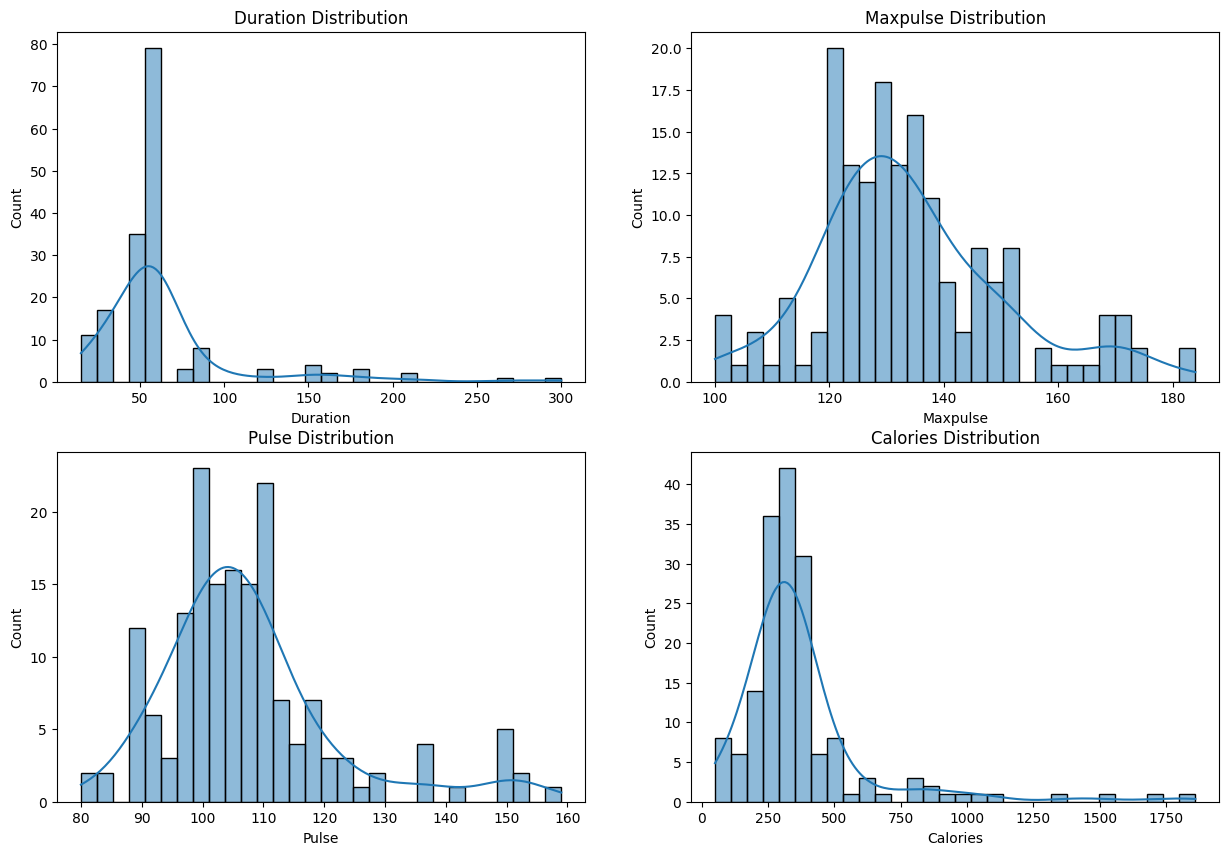

In [39]:
#histogram
#set up figure size
plt.figure(figsize=(15, 10))
#histogram for duration
plt.subplot(2, 2, 1)
sns.histplot(df['Duration'], bins=30, kde=True)
plt.title('Duration Distribution')
#histogram for pulse
plt.subplot(2, 2, 3)
sns.histplot(df['Pulse'], bins=30, kde=True)
plt.title('Pulse Distribution')
#exercise plot for maxpulse and calories for histogram
#histogram for Maxpulse
plt.subplot(2, 2, 2)
sns.histplot(df['Maxpulse'], bins=30, kde=True)
plt.title('Maxpulse Distribution')
#histogram for Calories
plt.subplot(2, 2, 4)
sns.histplot(df['Calories'], bins=30, kde=True)
plt.title('Calories Distribution')


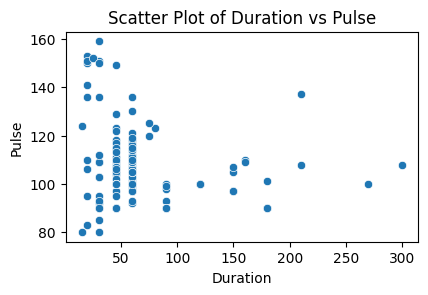

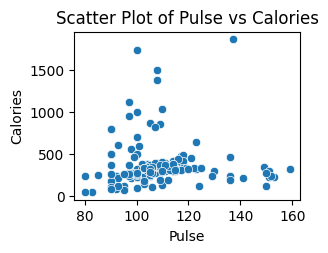

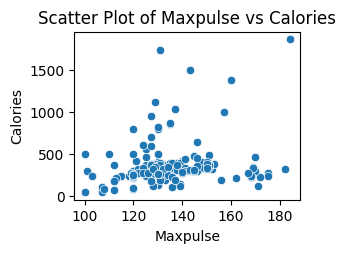

In [40]:
#scatter plot for duration
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.scatterplot(x='Duration', y='Pulse', data=df)
plt.title('Scatter Plot of Duration vs Pulse')
plt.xlabel('Duration')
plt.ylabel('Pulse')
plt.show()
#scatter for pulse 
plt.subplot(2, 2, 2)
sns.scatterplot(x='Pulse', y='Calories', data=df)
plt.title('Scatter Plot of Pulse vs Calories')
plt.xlabel('Pulse')
plt.ylabel('Calories')
plt.show()
#scatter for maxpulse and calories
plt.subplot(2, 2, 3)
sns.scatterplot(x='Maxpulse', y='Calories', data=df)
plt.title('Scatter Plot of Maxpulse vs Calories')
plt.xlabel('Maxpulse')
plt.ylabel('Calories')
plt.show()


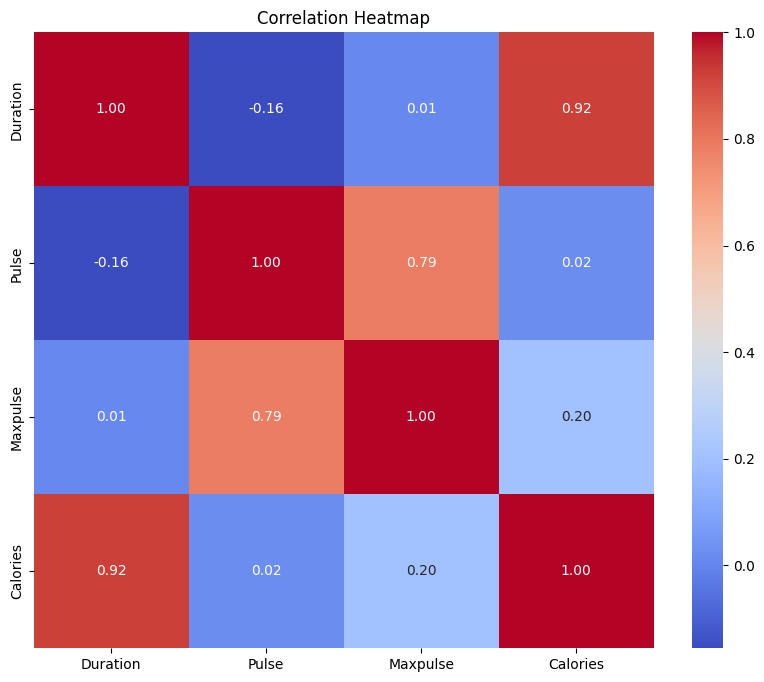

In [37]:
#correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()